In [22]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


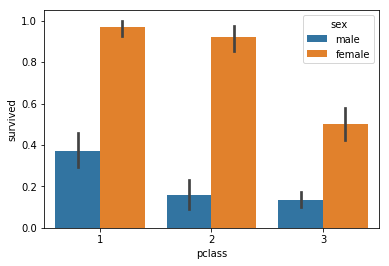

In [31]:
print(titanic.head(5))
fig1 = sns.barplot(x='pclass',y='survived',hue='sex',data=titanic)

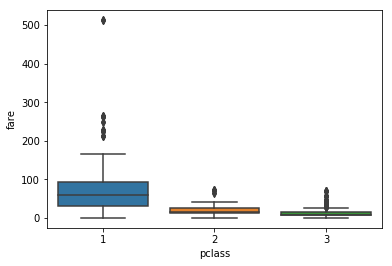

In [5]:
sns.boxplot(x='pclass',y='fare',data=titanic)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'Petallængde')

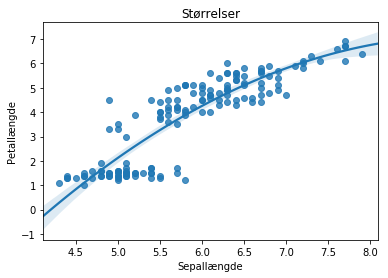

In [7]:
plot = sns.regplot(x='sepal_length',y='petal_length',data=iris,order=2)
plot.set_title('Størrelser')
plot.set_xlabel('Sepallængde')
plot.set_ylabel('Petallængde')

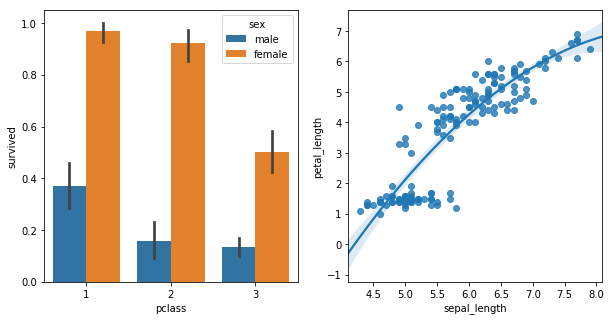

In [12]:
f,axes = plt.subplots(1,2, figsize=(10,5))
sns.barplot(x='pclass',y='survived',hue='sex',data=titanic,ax=axes[0])
sns.regplot(x='sepal_length',y='petal_length',data=iris,order=2,ax=axes[1])

In [13]:
f.savefig('figur2.png')

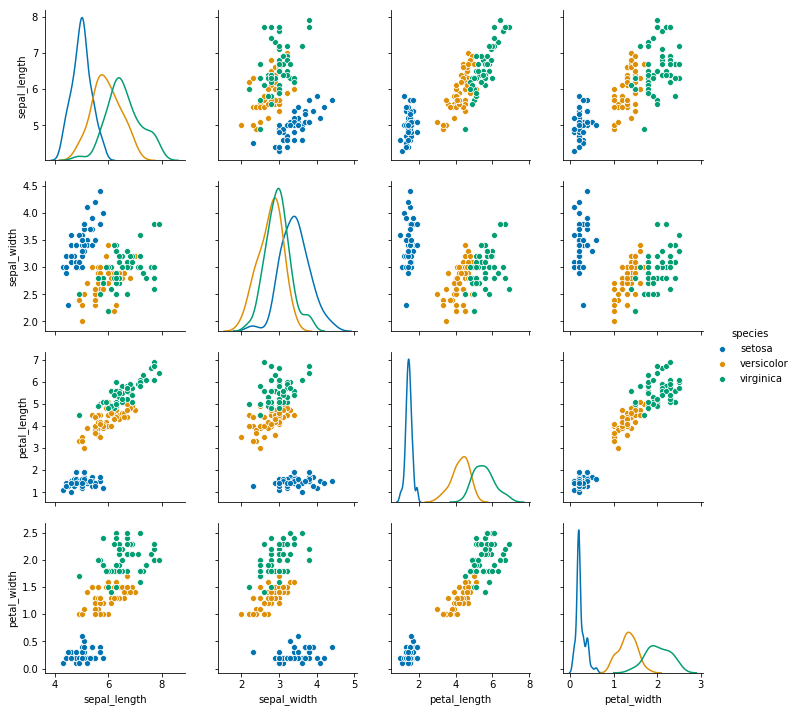

In [15]:
sns.pairplot(iris,hue='species',palette='colorblind',diag_kind='kde',diag_kws=dict(shade=False))

C:\Users\tsk\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\tsk\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


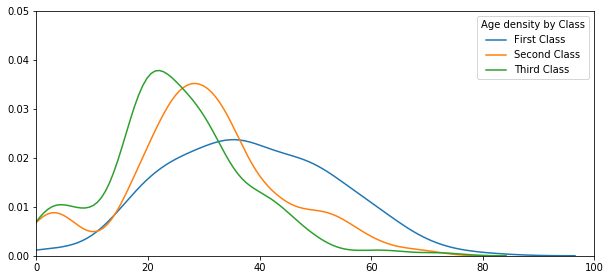

In [114]:
a,ax1=plt.subplots(figsize=(10,4.5))
ax1.set_xlim([0,100])
ax1.set_ylim([0,.05])
#b = titanic['age']
#d = b[~np.isnan(b)]
t1 = titanic[titanic['pclass']==1]
t2 = titanic[titanic['pclass']==2]
t3 = titanic[titanic['pclass']==3]
for i in [t1,t2,t3]:
    sns.kdeplot(i['age'])
plt.legend(title='Age density by Class',
           labels=['First Class','Second Class','Third Class'])

In [156]:
url1 = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'
data = pd.read_csv(url1,compression='infer',header=None)
data2 = data.drop(columns=[4,5,6,7]).copy()
data2.columns = ['Station', 'Date', 'Type', 'Value']
data2 = data2.loc[(data2['Station']=='ITE00100550')&(data2['Type']=='TMAX')]

In [170]:
data2['Value'] = data2['Value']/10

In [171]:
data2['Date'] = pd.to_datetime(data2['Date'],format='%Y%m%d')

In [172]:
data2.set_index(data2['Date'],inplace=True)
data2['Month'] = data2['Date'].dt.month

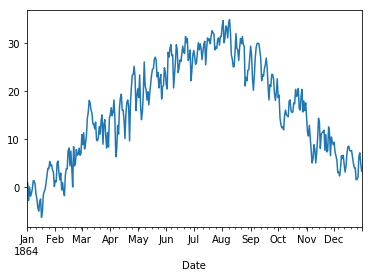

In [173]:
data2['Value'].plot()

In [181]:
data2['Country'] = data2['Station'].str.extract('([A-Z]+)')
data2.head()

,Station,Date,Type,Value,Month,Country
Date,,,,,,
1864-01-01,ITE00100550,1864-01-01,TMAX,1.0,1,ITE
1864-01-02,ITE00100550,1864-01-02,TMAX,0.8,1,ITE
1864-01-03,ITE00100550,1864-01-03,TMAX,-2.8,1,ITE
1864-01-04,ITE00100550,1864-01-04,TMAX,0.0,1,ITE
1864-01-05,ITE00100550,1864-01-05,TMAX,-1.9,1,ITE


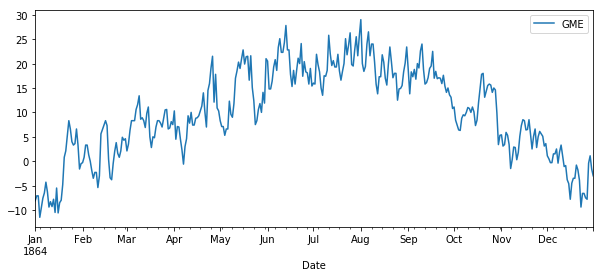

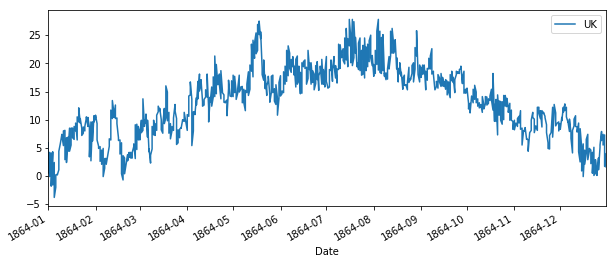

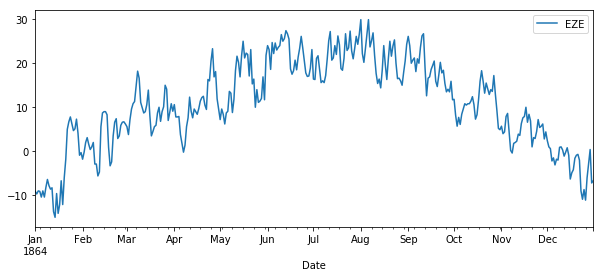

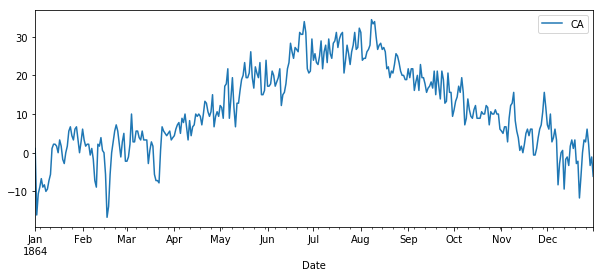

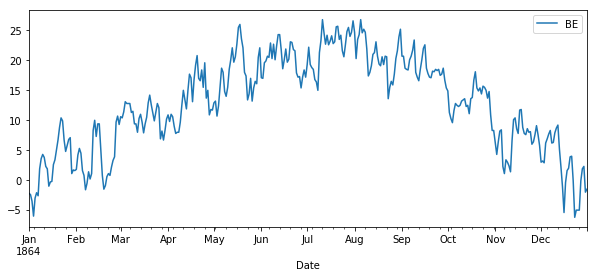

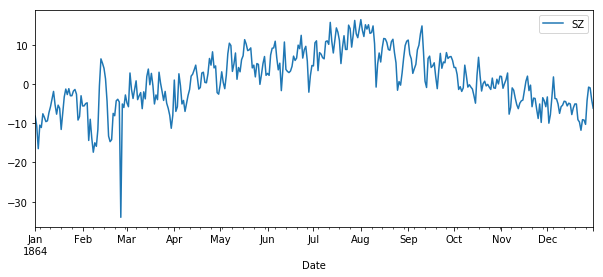

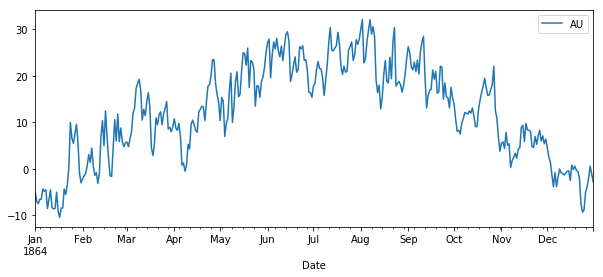

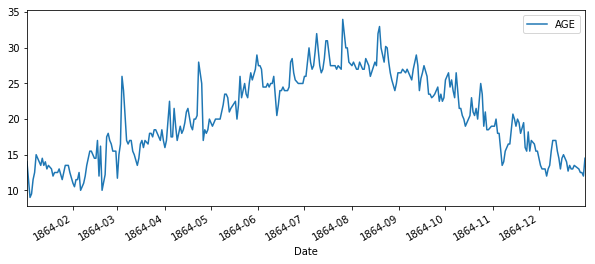

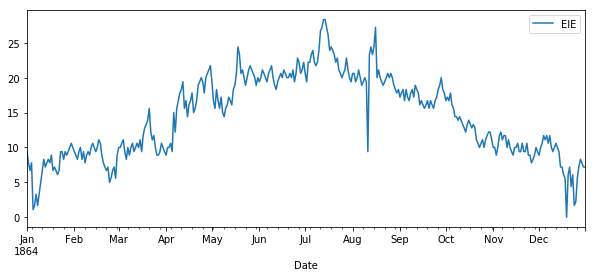

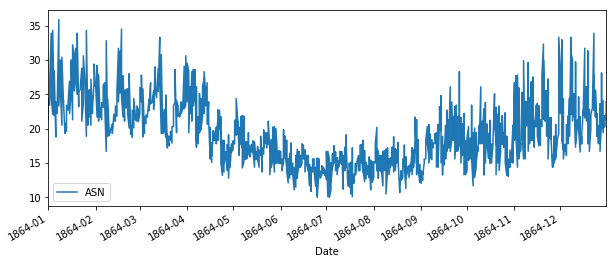

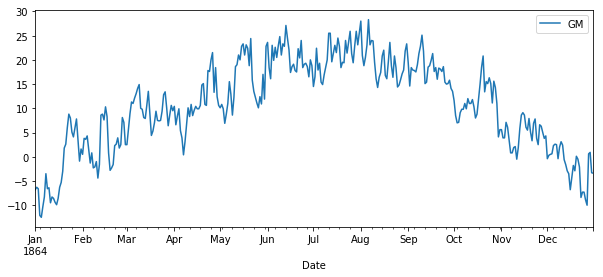

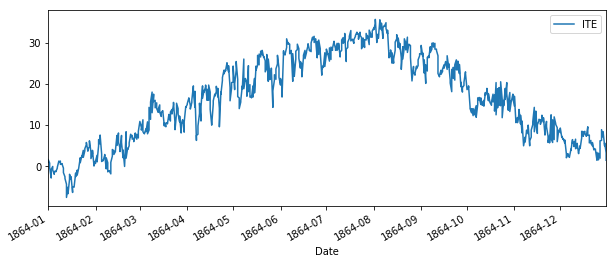

In [215]:
def load(year):
    url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/' + str(year) + '.csv.gz'
    data = pd.read_csv(url1,compression='infer',header=None)
    data = data.drop(columns=[4,5,6,7])
    data.columns = ['Station', 'Date', 'Type', 'Max. Temp.']
    data = data.loc[(data['Type']=='TMAX')]
    data2 = data
    data2['Max. Temp.'] = data2['Max. Temp.']/10
    data2['Date'] = pd.to_datetime(data2['Date'],format='%Y%m%d')
    data2.set_index(data2['Date'],inplace=True)
    data2['Country'] = data2['Station'].str.extract('([A-Z]+)')
    a = set(data2['Country'])
    for i in a:
        fig = plt.figure()
        ax = fig.add_subplot()
        data2[data2['Country']==i]['Max. Temp.'].plot(figsize=(10,4))
        plt.legend(labels=[i])
    
load(1964)